In [1]:
import pickle


simworldname = 'simulationWorld(4jul11p).xml'
groundtruth = '4jul11p.csv'

f = open('Data_' + simworldname + '.pckl', 'rb')
data1, oracle1, analyzer1 = pickle.load(f)
f.close()

data = {}

In [2]:
###############################
#### DATA ANALYSIS SECTION ####
###############################

import matplotlib as mpl
from datetime import datetime
import numpy as np

def AskLocationFromLocalizer(recent_grid):
    x, y = np.mean(zip(*np.where(recent_grid == np.max(recent_grid))), axis = 0)
    return [x/10, y/10]

readable_time_oracle = []
readable_time_analyzer = []
estimated_location = []
oracle_location = []

for t in oracle1['time']:
    # readable_time_oracle.append(datetime.utcfromtimestamp(t/1000).strftime('%H:%M:%S'))
    # print(type(t))
    readable_time_oracle.append(datetime.fromtimestamp(t/1000))
    
for t in analyzer1['time']:
    # readable_time_analyzer.append(datetime.utcfromtimestamp(int(t)/1000).strftime('%H:%M:%S'))
    # print(type(t))
    readable_time_analyzer.append(datetime.fromtimestamp(int(t)/1000))
    
for g in analyzer1['gridmap']:
    estimated_location.append(AskLocationFromLocalizer(g))
    
for t in oracle1['location']:
    oracle_location.append([t[0]/100, t[1]/100])


In [3]:
for t in range(len(analyzer1['time'])):
    analyzer1['time'][t] = int(analyzer1['time'][t])

In [4]:
deleted_times = []
data2 = {}
data2['time'] = []
data2['location'] = []
unpredicted_start = 0

data2['time'] = sorted(set(analyzer1['time'] + oracle1['time']))


for t in data2['time']:
    try:
        data2['location'].append(AskLocationFromLocalizer(analyzer1['gridmap'][analyzer1['time'].index(t)]))
        # print("shadan")
    except:
        try:
            data2['location'].append(data2['location'][len(data2['location']) - 1])
            # print("no")
        except:
            deleted_times.append(t)
            unpredicted_start = unpredicted_start + 1
            # data['location'].append([0,0])

for t in deleted_times:
    data2['time'].remove(t)
            
temp_time = []
for t in data2['time']:
    temp_time.append(datetime.fromtimestamp(t/1000))



<IPython.core.display.Javascript object>


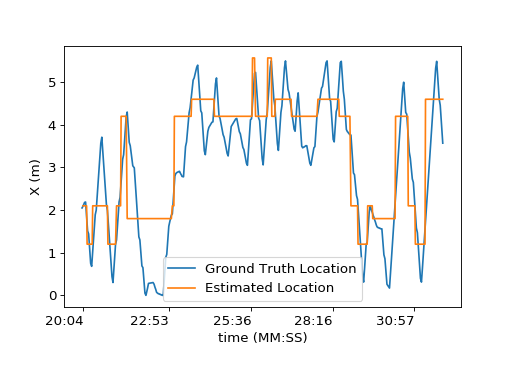

MSE:0.6968766121783134


In [10]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.dates import DateFormatter
import datetime
import random
import matplotlib.pyplot as plt

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 12

# fig = plt.figure()
# ax = plt.subplots()
# fig.autofmt_xdate()
# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (x)
# plt.plot(readable_time_oracle, zip(*oracle_location)[0] , label='Ground Truth (Oracle)')
# plt.plot(temp_time, zip(*data2['location'])[0], label='Estimated Location (Shadan)')

# (y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# plt.legend()
# plt.xlabel('time (HH MM SS)')
# plt.ylabel('X (m)')

# myFmt = DateFormatter("%H:%M:%S")
#  zaxis.set_major_formatter(myFmt)

# plt.show()

font = {
        'size'   : 12}

plt.rc('font', **font)

fig, ax = plt.subplots()
ax.plot(readable_time_oracle, zip(*oracle_location)[0], label='Ground Truth Location')
ax.plot(temp_time, zip(*data2['location'])[0], label='Estimated Location')
plt.legend()
myFmt = DateFormatter("%M:%S")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_ticks(temp_time[0::140])
plt.xticks(rotation=90)
plt.xlabel('time (MM:SS)')
plt.ylabel('X (m)')
## Rotate date labels automatically
fig.autofmt_xdate()
plt.xticks(rotation=0)
plt.show()



print("MSE:" + str(mean_squared_error(zip(*oracle_location)[0][unpredicted_start: len(oracle_location)], zip(*data2['location'])[0])))

<IPython.core.display.Javascript object>


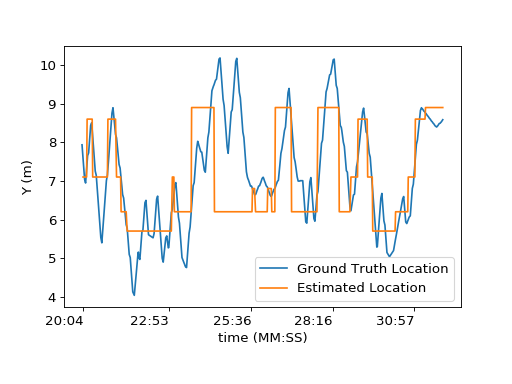

MSE:1.3963844377351267


In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 12
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# fig = plt.figure()

# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (y)
# plt.plot(readable_time_oracle, zip(*oracle_location)[1] , label='Ground Truth (Oracle)')
# plt.plot(temp_time, zip(*data2['location'])[1], label='Estimated Location (Shadan)')


# plt.legend()
# plt.xlabel('time (HH:MM:SS)')
# plt.ylabel('Y (m)')

# plt.show()



fig, ax = plt.subplots()
ax.plot(readable_time_oracle, zip(*oracle_location)[1], label='Ground Truth Location')
ax.plot(temp_time, zip(*data2['location'])[1], label='Estimated Location')
plt.legend()
myFmt = DateFormatter("%M:%S")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_ticks(temp_time[0::140])
plt.xticks(rotation=90)
plt.xlabel('time (MM:SS)')
plt.ylabel('Y (m)')
## Rotate date labels automatically
fig.autofmt_xdate()
plt.xticks(rotation=0)
plt.show()




print("MSE:" + str(mean_squared_error(zip(*oracle_location)[1][unpredicted_start: len(oracle_location)], zip(*data2['location'])[1])))

In [ ]:
errors = []
for i in range(len(data2['location'])):
    errors.append(np.linalg.norm(np.asarray(oracle_location[i]) - np.asarray(data2['location'][i])))

In [ ]:
import matplotlib.pyplot as plt

print(np.max(errors))
print(reduce(lambda x, y: x + y, errors) / len(errors))
# plt.plot(errors)

In [ ]:
from scipy.stats import ttest_ind

print("T-test for ground truth and Shadan: ")
print(ttest_ind(oracle_location, data2['location']))